<a href="https://colab.research.google.com/github/nithinreganti/Predicting-the-likeliness-of-the-alumni-to-donate-in-the-upcoming-years-UB-Philantropy/blob/master/Philantropy_donor_category_and_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UB Philantropy- Donor categorization and donation amount prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


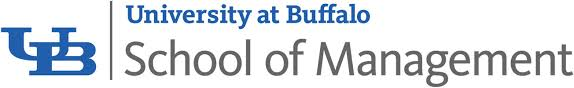

In [2]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/UB_Philantropy/logo.jpg", width=800, height=100)

## About the Philantropy team

At the University at Buffalo, the philantropy team is building a culture of lifelong alumni and donor engagement around the world and aggressively advocating for greater involvement and support among UB’s students, faculty and staff members, alumni and friends.


## Problem statement


Q1. Donor Retention: Among first time donors, who is likely to give again? (Predict donors most likely to renew.) 

Q2. Donor Acquisition: What behaviors lead to a prospect becoming a first time donor?

Q3. Donor upgrade: Likely amount of next gift.


## Donor Categorization 

#### Non-donors
Have not donated in past  5 years
#### Lapsed
Lapsed for atleast one year  – did not donate in 2017, but donated in either 2016, 2015, 2014, 2013
#### Loyal donor
Donated in 2017 and any of the last 4 years
#### First-time donors
Donating for the first time in 2017


#### Libraries Used: Pandas,numpy,seaborn,matplotlib,scipy,sklearn,graphviz

#### Machine Learning Models

Decision Tree Classifier - To Categorize the donors

Linear Regression and Random forest Regressor -To predict the amount of donation 


In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report


### Loading Data
Let's first load the required libraries and Philantropy Dataset using pandas' read CSV function 

In [4]:
ub_philantropy = pd.read_csv('/content/drive/My Drive/UB_Philantropy/Management_zipcode_1_use.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
ub_philantropy.shape

(34338, 52)

### Overview of the Datsaet

In [6]:
ub_philantropy.head(5)

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,SCHOOL2,DEGREE_CODE3,DEGREE_YEAR3,SCHOOL3,DEGREE_CODE4,DEGREE_YEAR4,SCHOOL4,DONOR_CATEGORY,LIFETIME_RECOGNITION_AMT,NO_YRS_GIVING,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,LAST_GIFT_DATE,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,GIVING_SCHOOL_UNIT1,GIVING_SCHOOL_UNIT2,GIVING_SCHOOL_UNIT3,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,Management,,,NaN,,,NaN,,,NaN,Lapsed,2470.00,34.0,0.0,300.0,0.0,100.0,100.0,0.0,0.0,0.0,50.0,0.0,90.0,23-08-2018,01-01-1900,70.00,Management,Graduate Education,University Wide,5,0,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,Management,,,NaN,,,NaN,,,NaN,Reacquired,522.00,23.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,45.0,0.0,0.0,0.0,10-10-2017,30-04-1982,2.00,Management,Athletics,University Wide,5,0,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,Management,,,NaN,,,NaN,,,NaN,Non Donor,19.92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15-01-1992,15-01-1992,19.92,University Wide,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,Management,,,NaN,,,NaN,,,NaN,Non Donor,155.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28-01-1987,28-01-1987,35.00,Management,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,Management,,,NaN,,,NaN,,,NaN,Non Donor,30.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-12-1994,31-01-1990,10.00,Management,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0


Lets take a look at the variables available

In [7]:
ub_philantropy.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

### Exploratory Data Analysis
#### Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods

### Visualizing the Categories

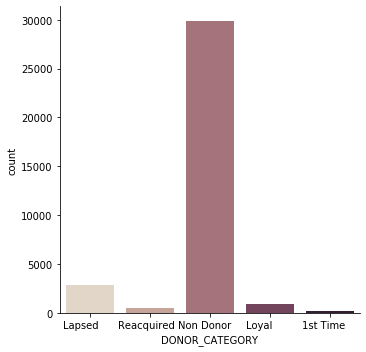

In [8]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=ub_philantropy)

###  Data Cleaning : Lets check for the missing values

In [9]:
ub_philantropy.isnull().sum()

ID_NUMBER                           0
FACULTY_STAFF_IND                   0
MARITAL_STATUS                      0
GENDER                              0
AGE_BRACKET                         0
STATE_CODE                        291
ZIPCODE                           292
STUDENT_ACTIVITY_PARTICIPANT        0
DEGREE_CODE1                        0
DEGREE_YEAR1                        0
SCHOOL1                             0
DEGREE_CODE2                        0
DEGREE_YEAR2                        0
SCHOOL2                         28807
DEGREE_CODE3                        0
DEGREE_YEAR3                        0
SCHOOL3                         33772
DEGREE_CODE4                        0
DEGREE_YEAR4                        0
SCHOOL4                         34300
DONOR_CATEGORY                      0
LIFETIME_RECOGNITION_AMT        23303
NO_YRS_GIVING                   23083
GIFT_AMOUNT_2018_NEW                0
GIFT_AMOUNT_2017_NEW                0
GIFT_AMOUNT_2016_NEW                0
GIFT_AMOUNT_

### Now let us drop the columns which has more than 500 missing values

In [0]:
cols = ub_philantropy.columns.tolist()
drop_cols = []
for col in cols:
    if ub_philantropy[col].isnull().sum() > 500:
        drop_cols.append(col)
        
ub_philantropy.drop(columns=drop_cols, inplace=True)

In [11]:
ub_philantropy.shape

(34338, 41)

### Finding the total number of numerical columns

In [12]:
print('Total numerical vlaued columns: ', len(ub_philantropy.select_dtypes(include=np.number).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.number).columns:
    print(col)

Total numerical vlaued columns:  26 

ID_NUMBER
AGE_BRACKET
DEGREE_YEAR1
GIFT_AMOUNT_2018_NEW
GIFT_AMOUNT_2017_NEW
GIFT_AMOUNT_2016_NEW
GIFT_AMOUNT_2015_NEW
GIFT_AMOUNT_2014_NEW
GIFT_AMOUNT_2013_NEW
GIFT_AMOUNT_2012_NEW
GIFT_AMOUNT_2011_NEW
GIFT_AMOUNT_2010_NEW
GIFT_AMOUNT_2009_NEW
GIFT_AMOUNT_2008_NEW
ENGAGEMENT_SCORE
NO_EVENTS_2018_NEW
NO_EVENTS_2017_NEW
NO_EVENTS_2016_NEW
NO_EVENTS_2015_NEW
NO_EVENTS_2014_NEW
NO_EVENTS_2013_NEW
NO_EVENTS_2012_NEW
NO_EVENTS_2011_NEW
NO_EVENTS_2010_NEW
NO_EVENTS_2009_NEW
NO_EVENTS_2008_NEW


### Calculating the total number of Categorical columns or features

In [13]:
print('Total categorical valued columns: ', len(ub_philantropy.select_dtypes(include=np.object).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.object).columns:
    print(col)

Total categorical valued columns:  15 

FACULTY_STAFF_IND
MARITAL_STATUS
GENDER
STATE_CODE
ZIPCODE
STUDENT_ACTIVITY_PARTICIPANT
DEGREE_CODE1
SCHOOL1
DEGREE_CODE2
DEGREE_YEAR2
DEGREE_CODE3
DEGREE_YEAR3
DEGREE_CODE4
DEGREE_YEAR4
DONOR_CATEGORY


## Predicting the donation amount using regression

### Correlation Coeffecients:
The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. ... A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation

The donation amount in 2018 is taken as the target variable to build a regression model to predict the donation amount

In [14]:
#Correlation between GIFT_AMOUNT_2018_NEW and other numerical values
ub_philantropy.corr()['GIFT_AMOUNT_2018_NEW'].sort_values(ascending=False)

GIFT_AMOUNT_2018_NEW    1.000000
GIFT_AMOUNT_2015_NEW    0.326208
GIFT_AMOUNT_2014_NEW    0.273330
GIFT_AMOUNT_2012_NEW    0.233355
GIFT_AMOUNT_2013_NEW    0.220807
GIFT_AMOUNT_2010_NEW    0.214064
GIFT_AMOUNT_2016_NEW    0.199159
GIFT_AMOUNT_2009_NEW    0.182934
GIFT_AMOUNT_2017_NEW    0.168465
ENGAGEMENT_SCORE        0.153428
NO_EVENTS_2014_NEW      0.098489
NO_EVENTS_2018_NEW      0.098176
GIFT_AMOUNT_2011_NEW    0.093104
NO_EVENTS_2017_NEW      0.090915
NO_EVENTS_2013_NEW      0.089592
NO_EVENTS_2015_NEW      0.080415
NO_EVENTS_2016_NEW      0.072375
NO_EVENTS_2009_NEW      0.069504
NO_EVENTS_2011_NEW      0.061458
NO_EVENTS_2012_NEW      0.059055
NO_EVENTS_2010_NEW      0.058058
NO_EVENTS_2008_NEW      0.053499
AGE_BRACKET             0.020469
GIFT_AMOUNT_2008_NEW    0.012120
DEGREE_YEAR1           -0.025627
ID_NUMBER              -0.026878
Name: GIFT_AMOUNT_2018_NEW, dtype: float64

In [0]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 10,6

### Relation between target variable and highest correlated feature

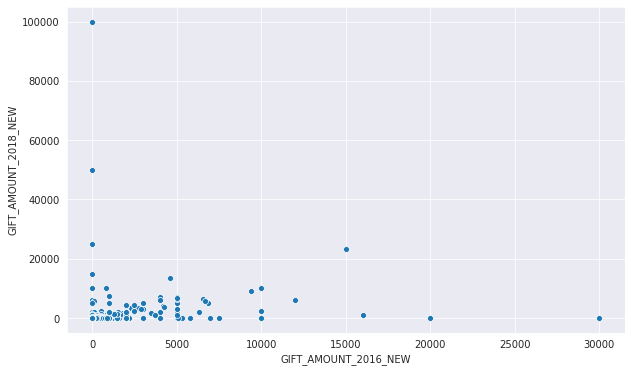

In [16]:
sns.scatterplot(data=ub_philantropy,
           x=ub_philantropy['GIFT_AMOUNT_2016_NEW'],
           y=ub_philantropy['GIFT_AMOUNT_2018_NEW']
          )

plt.show()

### A histogram to check the skewness of the target variable

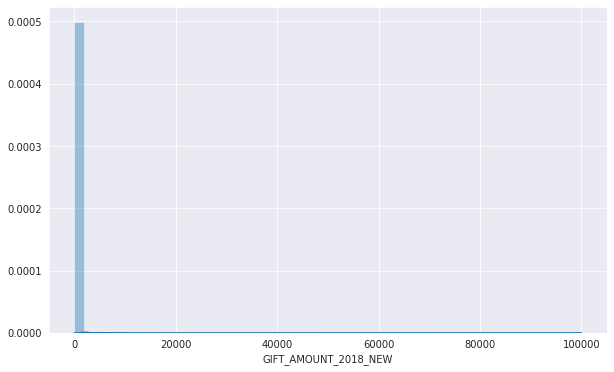

In [17]:
sns.distplot(ub_philantropy['GIFT_AMOUNT_2018_NEW'])
plt.show()

## Regression Models

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Excluding the categorical columns for regression

In [0]:
cat_cols = ub_philantropy.select_dtypes(include=np.object).columns.tolist()

num_cols = ub_philantropy.select_dtypes(include=np.number).columns.tolist()

In [20]:
df = ub_philantropy.copy(deep=True)
df = df[num_cols]
X = df.drop(columns=['GIFT_AMOUNT_2018_NEW'])
y = df['GIFT_AMOUNT_2018_NEW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Saving id number for future use
train_id_number = X_train['ID_NUMBER']
test_id_number = X_test['ID_NUMBER']
X_train.drop(columns=['ID_NUMBER'], inplace=True)
X_test.drop(columns=['ID_NUMBER'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Function to determine the count of observations in each range (Mean absolute Error)

In [0]:
def checkMAE(actual, pred, n):
    count = 0
    for i in range(len(actual)):
        if abs(actual[i] - pred[i]) > n:
            count +=1
    
    return count

mae_values = [10, 25, 50, 75, 100]

In [23]:
lr_train_pred = lr.predict(X_train)
print('\t\t\t\tLinear Regression with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, lr_train_pred))
print('MAE: ', mean_absolute_error(y_train, lr_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, lr_train_pred))
print('\n')
lr_test_pred = lr.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, lr_test_pred))
print('MAE: ', mean_absolute_error(y_test, lr_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i) / len(y_test) * 100), '%)')

#print('r^2: ', r2_score(y_test, lr_test_pred))

				Linear Regression with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  490712.5633631235
MAE:  51.938117999989196
Number of predicted values with >  10  AE:  18695 ( 68.06 %)
Number of predicted values with >  25  AE:  8982 ( 32.70 %)
Number of predicted values with >  50  AE:  4645 ( 16.91 %)
Number of predicted values with >  75  AE:  3491 ( 12.71 %)
Number of predicted values with >  100  AE:  2606 ( 9.49 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  132852.5620742199
MAE:  55.7300705089621
Number of predicted values with >  10  AE:  4675 ( 68.07 %)
Number of predicted values with >  25  AE:  2197 ( 31.99 %)
Number of predicted values with >  50  AE:  1160 ( 16.89 %)
Number of predicted values with >  75  AE:  873 ( 12.71 %)
Number of predicted values with >  100  AE:  641 ( 9.33 %)


### Random Forest Regressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
rf_train_pred = rf.predict(X_train)
print('\t\t\t\tRandom Forest Regressor with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, rf_train_pred))
print('MAE: ', mean_absolute_error(y_train, rf_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, rf_train_pred))

print('\n')
rf_test_pred = rf.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, rf_test_pred))
print('MAE: ', mean_absolute_error(y_test, rf_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, 'AE: ', checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i) / len(y_test) * 100), '%)')
#print('r^2: ', r2_score(y_test, rf_test_pred))

				Random Forest Regressor with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  138080.8696178996
MAE:  12.9068345712326
Number of predicted values with >  10  AE:  1727 ( 6.29 %)
Number of predicted values with >  25  AE:  1025 ( 3.73 %)
Number of predicted values with >  50  AE:  618 ( 2.25 %)
Number of predicted values with >  75  AE:  441 ( 1.61 %)
Number of predicted values with >  100  AE:  354 ( 1.29 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  596729.0651502822
MAE:  41.83314672236148
Number of predicted values with >  10 AE:  593 ( 8.63 %)
Number of predicted values with >  25 AE:  453 ( 6.60 %)
Number of predicted values with >  50 AE:  317 ( 4.62 %)
Number of predicted values with >  75 AE:  236 ( 3.44 %)
Number of predicted values with >  100 AE:  186 ( 2.71 %)


## Classification -Decision tree classifier

### Target Variable 
Donor Category

Function to get the accuracy metrics

In [0]:
def classification_stats(y_test, pred):
    '''Print classification metrics.'''
    print('Accuracy: ', round(accuracy_score(y_test, pred), 2), '\n')    
    print('Classification Report: \n', classification_report(y_test, pred), '\n')
    print('Confusion Matrix: \n', confusion_matrix(y_test, pred), '\n')   


Function to fit and train the model

In [0]:
def fit_predict(model, X_train, y_train, X_test):
    '''Trains model and returns predictions on test set.'''
    print(model.fit(X_train, y_train), '\n')
    pred = model.predict(X_test)
    return pred

Function to get the Predicted Data frame

In [0]:
def create_pred_dataframe(y_test, pred):
    '''Returns dataframe with Actual value and Predicted value.'''
    return pd.DataFrame({'Actual': y_test, 'Predicted': pred})

Function to print the Feature Importance

In [0]:
def create_feat_importance_dataframe(model, X_train):
    'Returns dataframe with feature importances.'
    return pd.DataFrame(model.feature_importances_, X_train.columns, columns=['Importance'])

**Feature Selection**

Here we  need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [0]:

X = ub_philantropy.drop(columns=['DONOR_CATEGORY'])
y = ub_philantropy['DONOR_CATEGORY'] #Target variablet

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy<br>
Let's call the function fit_predict()

**get_dummies** - It is a function used in Python to obtain dummy values for all the categorical values in Python since categorical values are not supported to train a model.

In [0]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

**Building Decision Tree Model**

Let's create a Decision Tree Model using Scikit-learn and print the accuracy metrics , sample and predicted dataframes and also the feature importances

In [32]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)
pred = fit_predict(clf, X_train, y_train, X_test)
classification_stats(y_test, pred)
pred_df = create_pred_dataframe(y_test, pred)
feat_imp_df = create_feat_importance_dataframe(clf, X_train)
print('Sample of Actual vs Predicted Dataframe:\n\n', pred_df.sample(10), '\n')
print('Top Important Features:\n\n',
      feat_imp_df.sort_values(by='Importance', ascending=False).head(20), '\n')



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

Accuracy:  1.0 

Classification Report: 
               precision    recall  f1-score   support

1st Time           0.86      0.64      0.74        67
Lapsed             1.00      1.00      1.00       843
Loyal              1.00      1.00      1.00       273
Non Donor          1.00      1.00      1.00      8956
Reacquired         0.93      0.96      0.94       163

    accuracy                           1.00     10302
   macro avg       0.96      0.92      0.94     10302
weighted avg       1.00      1.00      1.00     10302
 

Confusion Matrix: 
 [[  43    0    0  

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the categories of donors<br>
Accuracy can be computed by comparing actual test set values and predicted values

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9968938070277616


**Conclusion**:

    We have categorized the alumni to:
    1. Donors
    2. Non Donors
    3. Loyal Donors
    4. Acquired Donors
    5. Lapsed Donors
    
    with high model accuracy

    
    

# Targetting the first time donors -Pre defined Classification

Now we are trying to solve Problem statement 2 which is finding out the behaviors that lead to become a first time donor

In [34]:
ub_philantropy.shape

(34338, 41)

In [35]:
ub_philantropy.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,DEGREE_CODE3,DEGREE_YEAR3,DEGREE_CODE4,DEGREE_YEAR4,DONOR_CATEGORY,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,Management,,,,,,,Lapsed,0.0,300.0,0.0,100.0,100.0,0.0,0.0,0.0,50.0,0.0,90.0,5,0,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,Management,,,,,,,Reacquired,25.0,0.0,0.0,0.0,0.0,0.0,25.0,45.0,0.0,0.0,0.0,5,0,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x=ub_philantropy.groupby('DONOR_CATEGORY')

In [37]:
x.size()

DONOR_CATEGORY
1st Time          223
Lapsed           2823
Loyal             920
Non Donor       29868
Reacquired        504
dtype: int64

### Filtering out the dataframe to have only first time donors

In [0]:
First_time_donor=ub_philantropy[ub_philantropy["DONOR_CATEGORY"] == "1st Time    "]


In [39]:
len(First_time_donor)

223

Now that we know we have 223 first time donors let us sample approximately same number of entries from the remaining so that the dataset is balanced and the model is not biased

In [40]:
ub_philantropy['DONOR_CATEGORY'].unique()

array(['Lapsed      ', 'Reacquired  ', 'Non Donor   ', 'Loyal       ',
       '1st Time    '], dtype=object)

In [41]:
First_time_donor.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,DEGREE_CODE3,DEGREE_YEAR3,DEGREE_CODE4,DEGREE_YEAR4,DONOR_CATEGORY,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
99,443721,N,U,M,25,NJ,7058,N,MS,2014,Management,,,,,,,1st Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0,0,0,0,0,0,0,0,0,0
135,477319,N,U,M,30,NY,14217,N,BS,2018,Management,,,,,,,1st Time,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0,0,0,0,0,0,0,0,0,0
150,401147,N,U,M,25,NY,10022,Y,MS,2015,Management,BS,2014,,,,,1st Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,1,0,3,1,0,0,0,0,0
172,466964,N,U,M,25,NY,11236,Y,MBA,2018,Management,,,,,,,1st Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,5,2,0,0,0,0,0,0,0,0,0
338,372594,N,S,F,30,NY,14610,Y,BS,2011,Management,,,,,,,1st Time,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,4,0,0,0,0,0,0,0,0,0,0


### Performing simple random sampling to get 300 entries from the rest of the data

In [0]:
Sampled_data=ub_philantropy.sample(n=300, random_state=1)

In [43]:
Sampled_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,DEGREE_CODE3,DEGREE_YEAR3,DEGREE_CODE4,DEGREE_YEAR4,DONOR_CATEGORY,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
26535,412517,N,U,F,25,OH,44312,N,BS,2013,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1960,23805,N,M,M,60,VA,20148,Y,MBA,1979,Management,MS,1979,BS,1977,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
27638,370967,N,U,M,30,NY,11710,N,BS,2009,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0,0,1,0,0,0,0,0
26740,295682,N,U,F,60,,31015,N,SEMBA,2003,Management,,,,,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
34177,34021,N,U,M,50,,,N,MBA,1992,Management,BS,1989,BS,1989,,,Non Donor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
Sampled_data['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
1st Time          2
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

### Excluding the first time donors from the sampled output 

In [0]:
y=Sampled_data[Sampled_data['DONOR_CATEGORY'] != '1st Time    ']

In [46]:
y['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

### Concatenating the dataframes to prepare a dataset for our classification problem

In [0]:
First_time_with_sampled=pd.concat([First_time_donor, y])

In [48]:
len(First_time_with_sampled)

521

Now we categorize the entire dataset into either First time donors or Rest

In [0]:
First_time_with_sampled['DONOR_CATEGORY']=First_time_with_sampled['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')

**Distribution of the categories visualized**

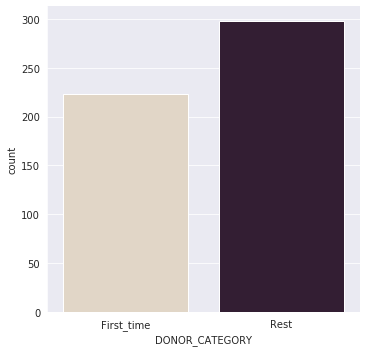

In [50]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled)

Handling the missing values 

In [0]:
First_time_with_sampled['AGE_BRACKET'].fillna((First_time_with_sampled['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled['ENGAGEMENT_SCORE'].mean()),inplace=True)
First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)

In [0]:
feature_cols =['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

### Input 
The input to the model is the array of Feature columns listed in the previous cell
### Target Variable 
The target variable is the Donor category

In [0]:
X1 = First_time_with_sampled[feature_cols]
y1 = First_time_with_sampled['DONOR_CATEGORY']

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42) 

**Building Decision Tree Model**

Let's create a Decision Tree Model using Scikit-learn and print the accuracy metrics , sample and predicted dataframes and also the feature importances

In [55]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf1 = clf1.fit(X1_train,y1_train)
pred1 = clf1.predict(X1_test)
classification_stats(y1_test, pred1)
pred1_df = create_pred_dataframe(y1_test, pred1)
feat_imp_df1 = create_feat_importance_dataframe(clf1, X1_train)
print('Sample of Actual vs Predicted Dataframe:\n\n', pred1_df.sample(10), '\n')
print('Top Important Features:\n\n',
      feat_imp_df1.sort_values(by='Importance', ascending=False).head(20), '\n')

Accuracy:  0.96 

Classification Report: 
               precision    recall  f1-score   support

  First_time       0.96      0.96      0.96        72
        Rest       0.96      0.96      0.96        85

    accuracy                           0.96       157
   macro avg       0.96      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157
 

Confusion Matrix: 
 [[69  3]
 [ 3 82]] 

Sample of Actual vs Predicted Dataframe:

            Actual   Predicted
2486         Rest        Rest
2220   First_time  First_time
6613   First_time  First_time
16496        Rest        Rest
12376        Rest        Rest
22174        Rest        Rest
5209         Rest        Rest
20681        Rest        Rest
5561   First_time  First_time
5057   First_time  First_time 

Top Important Features:

                               Importance
ENGAGEMENT_SCORE                0.925507
AGE_BRACKET                     0.038042
NO_EVENTS_2017_NEW              0.036451
STUDENT_ACTIVITY_PARTI

Accuracy Metrics


In [56]:
print("Accuracy:",metrics.accuracy_score(y1_test,pred1))

Accuracy: 0.9617834394904459


### Visualizing the Decision tree using graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


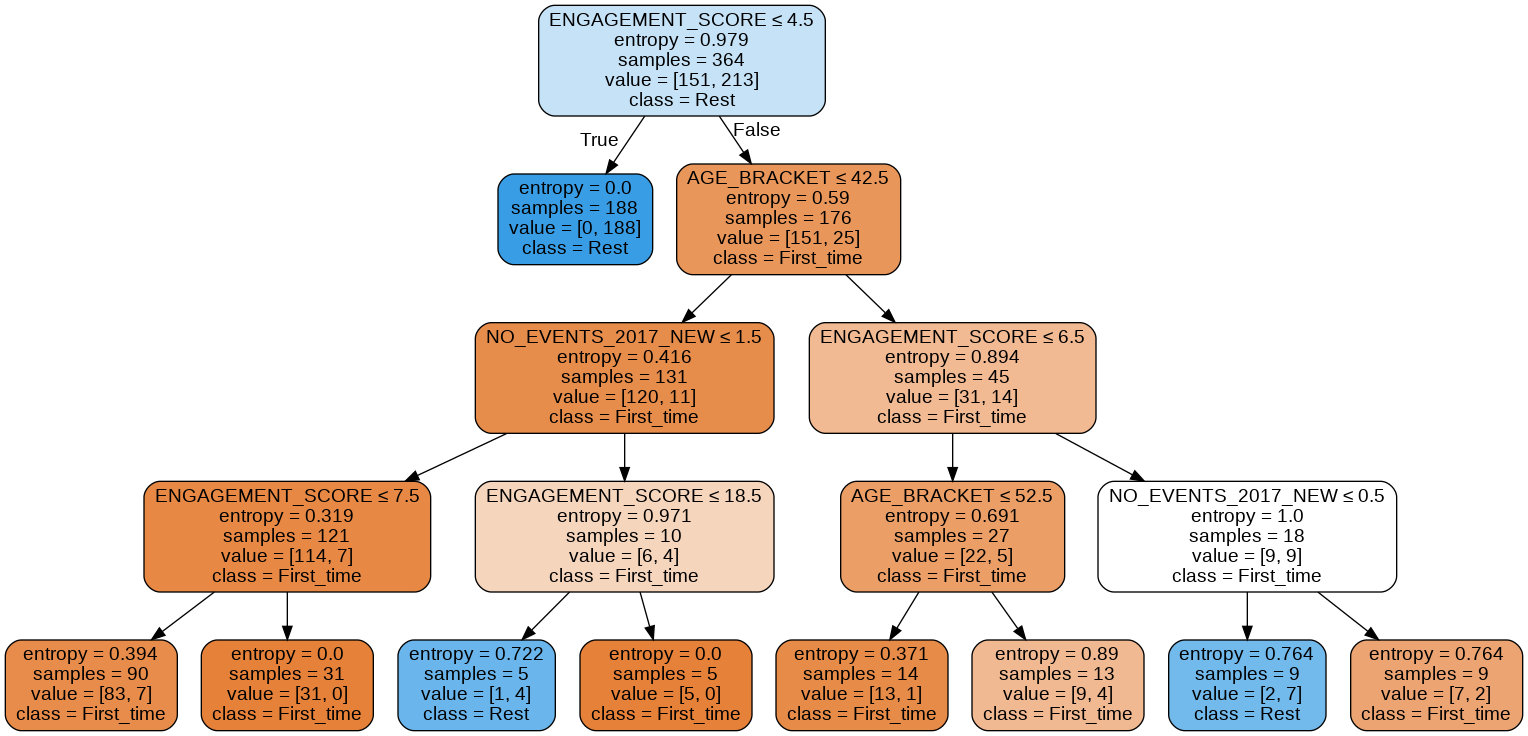

In [57]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())

# Reclassification - Based on Last given Amount

After some research we came to know that the data was taken according to the finacial year and not calender year .
So we started to build a model by a new label .
We labelled the data considering whose ever last gift amount was 0 in 2018 to not be a first time donor for the year 2018

In [58]:
Philantrophy_data=pd.read_csv('/content/drive/My Drive/UB_Philantropy/Management_zipcode_1_use.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
Philantrophy_data.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

Changing the label to Rest for those whose last gift amount was 0 in 2018

In [0]:
for i in range(len(Philantrophy_data)):
    if Philantrophy_data.iloc[i,23] == 0.0:
        Philantrophy_data.iloc[i,20] = 'Rest'               

Labelling the others as rest other than first time donors 

In [0]:
for i in range(len(Philantrophy_data)):
    if Philantrophy_data.iloc[i,20] !='1st Time    ':
        Philantrophy_data.iloc[i,20] = 'Rest' 

In [62]:
Philantrophy_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,SCHOOL2,DEGREE_CODE3,DEGREE_YEAR3,SCHOOL3,DEGREE_CODE4,DEGREE_YEAR4,SCHOOL4,DONOR_CATEGORY,LIFETIME_RECOGNITION_AMT,NO_YRS_GIVING,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,LAST_GIFT_DATE,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,GIVING_SCHOOL_UNIT1,GIVING_SCHOOL_UNIT2,GIVING_SCHOOL_UNIT3,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,Management,,,NaN,,,NaN,,,NaN,Rest,2470.00,34.0,0.0,300.0,0.0,100.0,100.0,0.0,0.0,0.0,50.0,0.0,90.0,23-08-2018,01-01-1900,70.00,Management,Graduate Education,University Wide,5,0,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,Management,,,NaN,,,NaN,,,NaN,Rest,522.00,23.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,45.0,0.0,0.0,0.0,10-10-2017,30-04-1982,2.00,Management,Athletics,University Wide,5,0,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,Management,,,NaN,,,NaN,,,NaN,Rest,19.92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15-01-1992,15-01-1992,19.92,University Wide,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,Management,,,NaN,,,NaN,,,NaN,Rest,155.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28-01-1987,28-01-1987,35.00,Management,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,Management,,,NaN,,,NaN,,,NaN,Rest,30.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-12-1994,31-01-1990,10.00,Management,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0


Data frame with only first time donors

In [0]:
First_time_donor_new=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]

In [64]:
len(First_time_donor_new)

187

In [0]:
Rest_firsttime=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] != "1st Time    "]

Sampling equal number of 'Rest' category 

In [0]:
Sampled_data_new=Rest_firsttime.sample(n=200, random_state=1)

Concatenating the dataframe

In [0]:
First_time_with_sampled_new=pd.concat([First_time_donor_new,Sampled_data_new])

Handling the missing values

In [0]:
First_time_with_sampled_new['DONOR_CATEGORY']=First_time_with_sampled_new['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled_new['MARITAL_STATUS']=First_time_with_sampled_new['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [0]:
First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled_new['AGE_BRACKET'].fillna((First_time_with_sampled_new['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled_new['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled_new['ENGAGEMENT_SCORE'].mean()),inplace=True)




Feature columns considered

In [0]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

Visualizing the categories

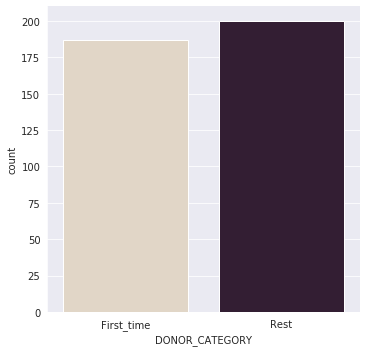

In [71]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled_new)

**Input** : Feature Columns

**Target Variable**: Donor category 

In [0]:
X2=First_time_with_sampled_new[feature_cols]
y2=First_time_with_sampled_new['DONOR_CATEGORY']

Splitting the data into train-test

In [0]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

Training and predicting the output

In [74]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf2 = clf2.fit(X2_train,y2_train)
pred2 = clf2.predict(X2_test)
classification_stats(y2_test, pred2)
pred2_df = create_pred_dataframe(y2_test, pred2)
feat_imp_df2 = create_feat_importance_dataframe(clf2, X2_train)
print('Sample of Actual vs Predicted Dataframe:\n\n', pred2_df.sample(10), '\n')
print('Top Important Features:\n\n',
      feat_imp_df2.sort_values(by='Importance', ascending=False).head(20), '\n')

Accuracy:  0.94 

Classification Report: 
               precision    recall  f1-score   support

  First_time       0.89      0.98      0.93        51
        Rest       0.98      0.91      0.94        66

    accuracy                           0.94       117
   macro avg       0.94      0.94      0.94       117
weighted avg       0.94      0.94      0.94       117
 

Confusion Matrix: 
 [[50  1]
 [ 6 60]] 

Sample of Actual vs Predicted Dataframe:

            Actual   Predicted
5513         Rest        Rest
10627  First_time  First_time
28236        Rest        Rest
6651   First_time  First_time
10074        Rest        Rest
28187        Rest        Rest
5555         Rest  First_time
10482  First_time  First_time
12731        Rest        Rest
16544        Rest        Rest 

Top Important Features:

                               Importance
ENGAGEMENT_SCORE                0.882735
AGE_BRACKET                     0.052546
NO_EVENTS_2017_NEW              0.032142
NO_EVENTS_2016_NEW    

Visualizing the Tree using graphviz

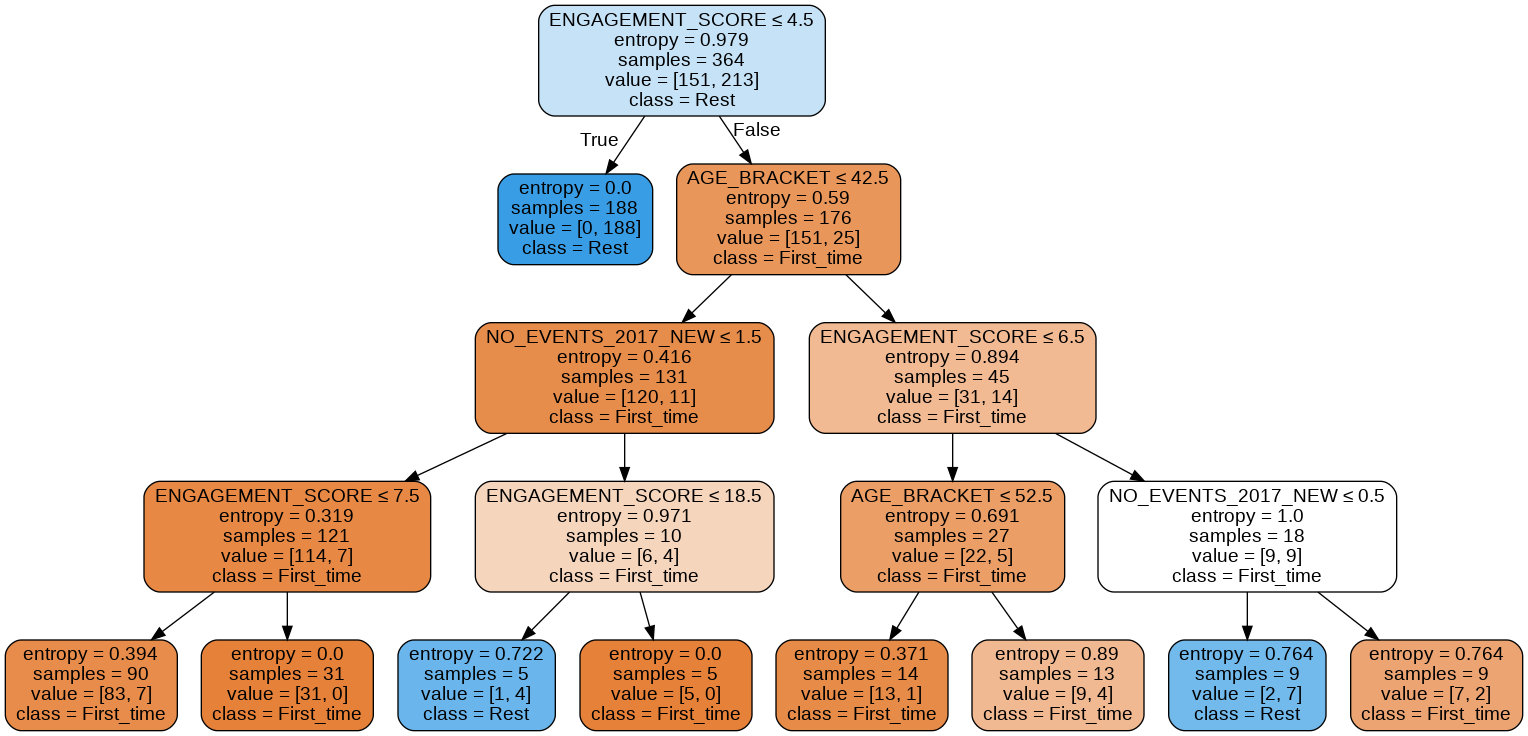

In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_new.png')
Image(graph.create_png())

## Reacquired

Since our aim is to target all the potential donors we concentrate on reacquired donors as well  

We repeat the same procedure as previous and draw out conclusions on factors depending on being a reaquired donor 

In [76]:
Philantropy_new=pd.read_csv('/content/drive/My Drive/UB_Philantropy/Management_zipcode_1_use.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
Philantropy_new.shape

(34338, 52)

In [78]:
Philantropy_new['DONOR_CATEGORY'].value_counts()

Non Donor       29868
Lapsed           2823
Loyal             920
Reacquired        504
1st Time          223
Name: DONOR_CATEGORY, dtype: int64

In [0]:
Reacquired=Philantropy_new[Philantropy_new['DONOR_CATEGORY']=='Reacquired  ']

In [80]:
Reacquired.shape

(504, 52)

In [0]:
Rest_without_reaquired=Philantropy_new.sample(n=500, random_state=1)

In [0]:
Reaquired_with_rest=pd.concat([Reacquired, Rest_without_reaquired])

In [83]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,SCHOOL2,DEGREE_CODE3,DEGREE_YEAR3,SCHOOL3,DEGREE_CODE4,DEGREE_YEAR4,SCHOOL4,DONOR_CATEGORY,LIFETIME_RECOGNITION_AMT,NO_YRS_GIVING,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,LAST_GIFT_DATE,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,GIVING_SCHOOL_UNIT1,GIVING_SCHOOL_UNIT2,GIVING_SCHOOL_UNIT3,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,N,BS,1981,Management,,,NaN,,,NaN,,,NaN,Reacquired,522.0,23.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,45.0,0.0,0.0,0.0,10-10-2017,30-04-1982,2.0,Management,Athletics,University Wide,5,0,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,N,PHD,2000,Education,MBA,1993,Management,,,NaN,,,NaN,Reacquired,1190.0,24.0,25.0,0.0,50.0,50.0,60.0,25.0,25.0,25.0,35.0,85.0,50.0,07-10-2018,13-04-1992,25.0,Graduate Education,University Wide,Management,6,0,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,N,BS,1986,Management,,,NaN,,,NaN,,,NaN,Reacquired,100.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26-09-2017,30-06-1986,25.0,University Wide,Management,NaN,5,0,0,0,0,1,0,0,0,0,0,0
30,45229,N,U,M,55,NY,10974,N,BS,1982,Management,,,NaN,,,NaN,,,NaN,Reacquired,360.0,5.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,0.0,20-01-2018,15-05-1984,50.0,Management,University Wide,Libraries,5,0,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,N,MBA,1989,Management,BS,1985,Engineering & Applied Science,,,NaN,,,NaN,Reacquired,145.0,7.0,20.0,0.0,0.0,0.0,0.0,25.0,20.0,0.0,0.0,0.0,0.0,01-10-2018,16-06-1994,10.0,University Wide,Center for the Arts,Athletics,6,0,0,0,0,0,0,0,0,0,0,0


In [84]:
len(Reaquired_with_rest)

1004

In [0]:
Reaquired_with_rest['DONOR_CATEGORY']=Reaquired_with_rest['DONOR_CATEGORY'].apply(lambda x: 'Reacquired' if (x== 'Reacquired  ') else 'Rest')
Reaquired_with_rest['MARITAL_STATUS']=Reaquired_with_rest['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [0]:
Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT']=Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
Reaquired_with_rest['AGE_BRACKET'].fillna((Reaquired_with_rest['AGE_BRACKET'].mean()),inplace=True)
Reaquired_with_rest['ENGAGEMENT_SCORE'].fillna((Reaquired_with_rest['ENGAGEMENT_SCORE'].mean()),inplace=True)


In [0]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

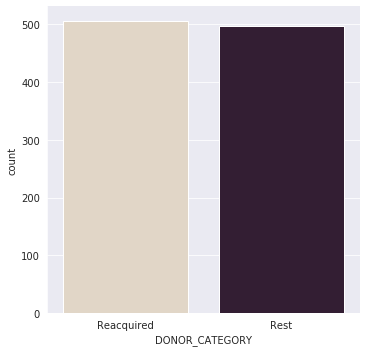

In [88]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=Reaquired_with_rest)

In [0]:
X3=Reaquired_with_rest[feature_cols]
y3=Reaquired_with_rest['DONOR_CATEGORY']

In [90]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,SCHOOL1,DEGREE_CODE2,DEGREE_YEAR2,SCHOOL2,DEGREE_CODE3,DEGREE_YEAR3,SCHOOL3,DEGREE_CODE4,DEGREE_YEAR4,SCHOOL4,DONOR_CATEGORY,LIFETIME_RECOGNITION_AMT,NO_YRS_GIVING,GIFT_AMOUNT_2018_NEW,GIFT_AMOUNT_2017_NEW,GIFT_AMOUNT_2016_NEW,GIFT_AMOUNT_2015_NEW,GIFT_AMOUNT_2014_NEW,GIFT_AMOUNT_2013_NEW,GIFT_AMOUNT_2012_NEW,GIFT_AMOUNT_2011_NEW,GIFT_AMOUNT_2010_NEW,GIFT_AMOUNT_2009_NEW,GIFT_AMOUNT_2008_NEW,LAST_GIFT_DATE,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,GIVING_SCHOOL_UNIT1,GIVING_SCHOOL_UNIT2,GIVING_SCHOOL_UNIT3,ENGAGEMENT_SCORE,NO_EVENTS_2018_NEW,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,0,BS,1981,Management,,,NaN,,,NaN,,,NaN,Reacquired,522.0,23.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,45.0,0.0,0.0,0.0,10-10-2017,30-04-1982,2.0,Management,Athletics,University Wide,5,0,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,0,PHD,2000,Education,MBA,1993,Management,,,NaN,,,NaN,Reacquired,1190.0,24.0,25.0,0.0,50.0,50.0,60.0,25.0,25.0,25.0,35.0,85.0,50.0,07-10-2018,13-04-1992,25.0,Graduate Education,University Wide,Management,6,0,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,0,BS,1986,Management,,,NaN,,,NaN,,,NaN,Reacquired,100.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26-09-2017,30-06-1986,25.0,University Wide,Management,NaN,5,0,0,0,0,1,0,0,0,0,0,0
30,45229,N,S,M,55,NY,10974,0,BS,1982,Management,,,NaN,,,NaN,,,NaN,Reacquired,360.0,5.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,0.0,20-01-2018,15-05-1984,50.0,Management,University Wide,Libraries,5,0,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,0,MBA,1989,Management,BS,1985,Engineering & Applied Science,,,NaN,,,NaN,Reacquired,145.0,7.0,20.0,0.0,0.0,0.0,0.0,25.0,20.0,0.0,0.0,0.0,0.0,01-10-2018,16-06-1994,10.0,University Wide,Center for the Arts,Athletics,6,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [92]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf3 = clf3.fit(X3_train,y3_train)
pred3 = clf3.predict(X3_test)
classification_stats(y3_test, pred3)
pred3_df = create_pred_dataframe(y3_test, pred3)
feat_imp_df3 = create_feat_importance_dataframe(clf3, X3_train)
print('Sample of Actual vs Predicted Dataframe:\n\n', pred3_df.sample(10), '\n')
print('Top Important Features:\n\n',
      feat_imp_df3.sort_values(by='Importance', ascending=False).head(20), '\n')

Accuracy:  0.95 

Classification Report: 
               precision    recall  f1-score   support

  Reacquired       0.92      0.98      0.95       147
        Rest       0.98      0.92      0.95       155

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302
 

Confusion Matrix: 
 [[144   3]
 [ 12 143]] 

Sample of Actual vs Predicted Dataframe:

            Actual   Predicted
13622        Rest        Rest
5864   Reacquired  Reacquired
1216   Reacquired  Reacquired
7911   Reacquired  Reacquired
4677   Reacquired  Reacquired
240          Rest        Rest
27997        Rest        Rest
2486         Rest        Rest
1283   Reacquired  Reacquired
3205         Rest        Rest 

Top Important Features:

                               Importance
ENGAGEMENT_SCORE                0.930744
AGE_BRACKET                     0.028846
NO_EVENTS_2016_NEW              0.023152
NO_EVENTS_2018_NEW

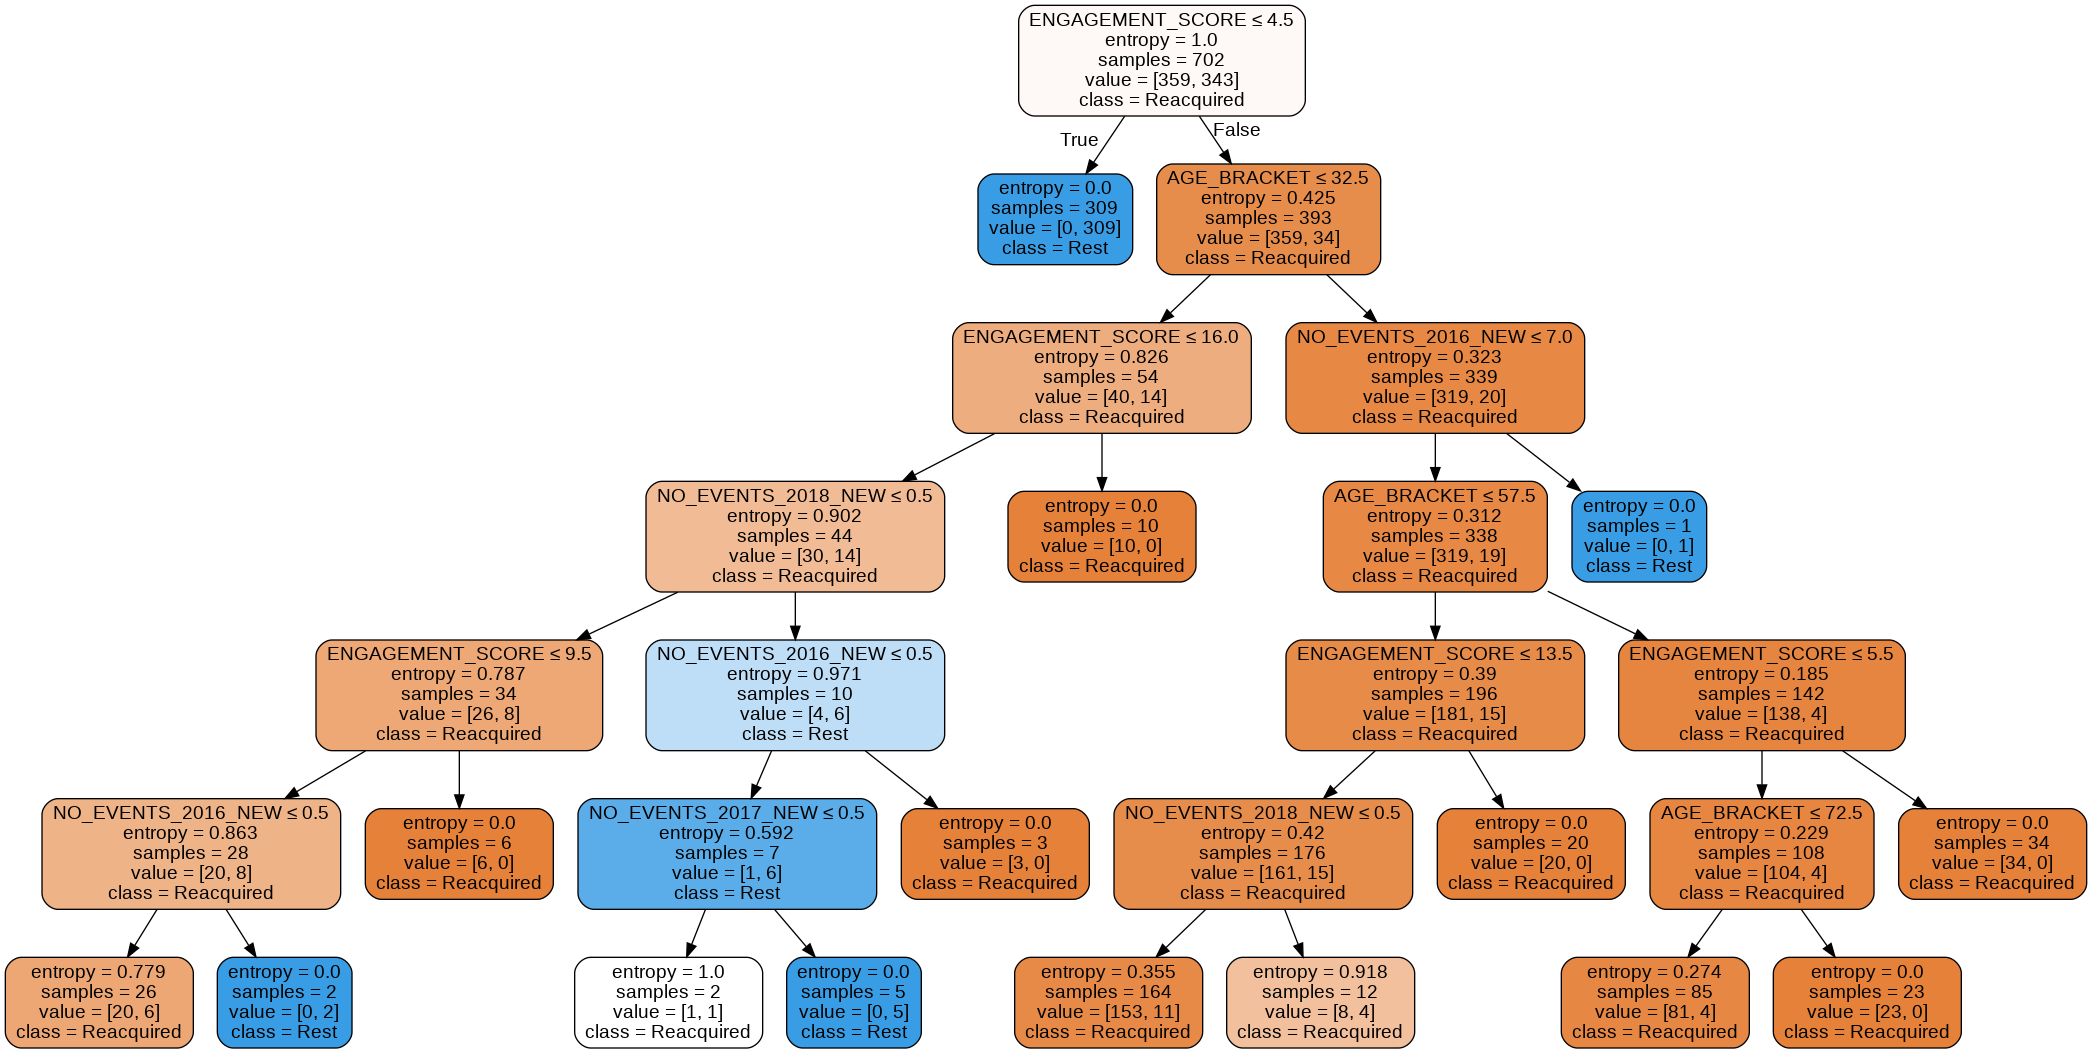

In [93]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Reacquired','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_reaquired.png')
Image(graph.create_png())

## A Snippet from Tableau Public

In [94]:
%%HTML
<div class='tableauPlaceholder' id='viz1581874282373' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UB&#47;UBPhilantropy&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UBPhilantropy&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UB&#47;UBPhilantropy&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1581874282373');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>